# 小説の文章スタイル分析探究 - Pythonと機械学習で文豪の秘密に迫ろう！

# ステップ1：はじめの一歩 - テキストデータに触れてみよう

In [1]:
# Google DriveをColabに接続するおまじない
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 【重要！】自分のGoogle Driveのファイルパスに合わせて書き換えてね！
# 例：'/content/drive/MyDrive/小説スタイル分析探究/novel_data/kokoro.txt'
file_path = '/content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/C_00/kokoro.txt' # 夏目漱石『こころ』の例

try:
    # ファイルを開いて、中身を読み込む
    # 'r'は読み込みモード、encoding='utf-8'は日本語の文字化けを防ぐおまじない
    with open(file_path, 'r', encoding='utf-8') as file:
        text_data = file.read() # ファイルの内容をすべて文字列として読み込む

    # --- 課題1：小説の総文字数を数えてみよう ---
    total_characters = len(text_data) # len()関数は文字列の長さを返す

    # --- 課題2：特定の単語の出現回数を数えてみよう ---
    search_word = "人間" # ここに数えたい単語を入力
    word_count = text_data.count(search_word) # count()メソッドは文字列中の特定の単語の出現回数を返す

    # --- 結果の表示 ---
    print(f"--- 分析結果：{file_path.split('/')[-1]} ---") # ファイル名を表示
    print(f"総文字数: {total_characters} 文字")
    print(f"単語「{search_word}」の出現回数: {word_count} 回")

except FileNotFoundError:
    print(f"エラー: ファイルが見つかりませんでした。パスを確認してください: {file_path}")
    print("【確認ポイント】")
    print("1. Google Driveは正しくマウントされていますか？（左側のフォルダアイコンで確認できます）")
    print("2. file_pathのフォルダ名やファイル名は、自分のGoogle Driveの内容と一致していますか？（大文字・小文字も区別されます）")
    print("3. 小説データフォルダは、指定した場所に正しくアップロードされていますか？")

--- 分析結果：kokoro.txt ---
総文字数: 186526 文字
単語「人間」の出現回数: 85 回


# ステップ2：文章のクリーニング - 分析の邪魔者を追い出そう！

In [3]:
import re # 正規表現を扱うためのライブラリ「re」をインポート

# Google DriveをColabに接続するおまじない (ステップ1で実行済みなら不要な場合もあります)
from google.colab import drive
drive.mount('/content/drive')

# 【重要！】自分のGoogle Driveのファイルパスに合わせて書き換えてね！
file_path = '/content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/C_00/kokoro.txt' # 夏目漱石『こころ』の例

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        original_text = file.read()

    # --- ここからクリーニング処理 ---
    cleaned_text = original_text

    # 1. ルビの削除 (例: 《ルビ》)
    # re.sub(パターン, 置換後文字列, 対象文字列)
    # 《と》の間にある、》以外の文字が1文字以上続くパターン (《[^》]+》) を空文字 "" に置換
    cleaned_text = re.sub(r"《[^》]+》", "", cleaned_text)
    print("ルビ削除後の数文字:", cleaned_text[:200]) # 処理結果を少しだけ表示して確認
    print()


    # 2. 読みの注意の削除 (例: ［注］, 【注】)
    # ［と］の間にある、］以外の文字が0文字以上続くパターン (［[^］]*］) を空文字 "" に置換
    cleaned_text = re.sub(r"［[^］]*］", "", cleaned_text)
    # 【と】の間にある、】以外の文字が0文字以上続くパターン (【[^】]*】) を空文字 "" に置換
    cleaned_text = re.sub(r"【[^】]*】", "", cleaned_text)
    print("読みの注意削除後の数文字:", cleaned_text[:200]) # 処理結果を少しだけ表示して確認
    print()

    # 3. 特定の記号とスペースの削除 (例: ｜, 全角スペース, 半角スペース)
    # ｜ または 全角スペース または 半角スペースのいずれか ([｜ 　]) を空文字 "" に置換
    # ※ ここでは添付資料のコードに合わせてスペースも削除していますが、
    #   分析目的によっては残す場合もあります。今回は削除します。
    cleaned_text = re.sub(r"[｜ 　]", "", cleaned_text)
    print("記号とスペース削除後の数文字:", cleaned_text[:200]) # 処理結果を少しだけ表示して確認
    print()
    # --- クリーニング処理ここまで ---

    # --- 結果の表示 ---
    print(f"\n--- クリーニング結果：{file_path.split('/')[-1]} ---")
    print(f"元の総文字数: {len(original_text)} 文字")
    print(f"クリーニング後の総文字数: {len(cleaned_text)} 文字")
    print(f"削減された文字数: {len(original_text) - len(cleaned_text)} 文字")
    print()

    # クリーニング前後のテキストの冒頭部分を比較してみましょう
    print("\n--- 元のテキスト（冒頭）---")
    print(original_text[:200]) # 冒頭200文字を表示
    print("\n--- クリーニング後のテキスト（冒頭）---")
    print(cleaned_text[:200]) # 冒頭200文字を表示

except FileNotFoundError:
    print(f"エラー: ファイルが見つかりませんでした。パスを確認してください: {file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ルビ削除後の数文字: 　私はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。これは世間を憚かる遠慮というよりも、その方が私にとって自然だからである。私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる。筆を執っても心持は同じ事である。よそよそしい頭文字などはとても使う気にならない。
　私が先生と知り合いになったのは鎌倉である。その時私はまだ若々しい書生であった。暑中休暇を利用

読みの注意削除後の数文字: 　私はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。これは世間を憚かる遠慮というよりも、その方が私にとって自然だからである。私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる。筆を執っても心持は同じ事である。よそよそしい頭文字などはとても使う気にならない。
　私が先生と知り合いになったのは鎌倉である。その時私はまだ若々しい書生であった。暑中休暇を利用

記号とスペース削除後の数文字: 私はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。これは世間を憚かる遠慮というよりも、その方が私にとって自然だからである。私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる。筆を執っても心持は同じ事である。よそよそしい頭文字などはとても使う気にならない。
私が先生と知り合いになったのは鎌倉である。その時私はまだ若々しい書生であった。暑中休暇を利用して


--- クリーニング結果：kokoro.txt ---
元の総文字数: 186526 文字
クリーニング後の総文字数: 161788 文字
削減された文字数: 24738 文字


--- 元のテキスト（冒頭）---
　私《わたくし》はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。これは世間を憚《はば》かる遠慮というよりも、その方が私にとって自然だからである。私はその人の記憶を呼び起すごとに、すぐ「先生」

# ステップ3：言葉の宝探し - 形態素解析ってなんだ？

In [4]:
# --- 1. ライブラリのインストール ---
# MeCab本体と辞書、PythonからMeCabを使うためのライブラリをインストールします。
# このセルは初回実行時のみ必要で、少し時間がかかることがあります。
!apt-get install -y mecab libmecab-dev mecab-ipadic-utf8 > /dev/null
!pip install unidic-lite mecab-python3 --quiet

import MeCab # MeCabをインポート

# --- 2. MeCabの準備 ---
# MeCab.Tagger() で形態素解析器のインスタンスを作成します。
# 引数なしだと、基本的な情報（表層形、品詞、活用など）が出力されます。
tagger = MeCab.Tagger()
# tagger = MeCab.Tagger("-Owakati") # 単語をスペースで区切って表示するモード（分かち書き）
# tagger = MeCab.Tagger("-Ochasen") # ChaSen互換形式（より詳細な情報）

# --- 3. サンプル文章の形態素解析 ---
sample_text = "すもももももももものうち。"
print(f"元の文章: {sample_text}\n")

# MeCabで解析実行
# tagger.parse() は解析結果を文字列として返します。
mecab_result_str = tagger.parse(sample_text)
print("--- MeCabの解析結果 (文字列) ---")
print(mecab_result_str)

# 解析結果を1行ずつ見てみましょう
# parseToNode() を使うと、各形態素の情報をオブジェクトとして扱えます。
node = tagger.parseToNode(sample_text)
print("--- MeCabの解析結果 (ノードごと) ---")
while node:
    # node.surface は単語の表層形 (例: "すもも")
    # node.feature は品詞などの情報 (例: "名詞,一般,*,*,*,*,すもも,スモモ,スモモ")
    print(f"表層形: {node.surface}\t 素性: {node.feature}")
    node = node.next # 次のノードへ

# --- 4. 添付資料のコードで使われている品詞情報に注目してみる ---
# 添付資料のコードでは、node.feature.split(',')[0] で最初の品詞情報を取得しています。
node = tagger.parseToNode(sample_text)
print("\n--- 品詞情報 (主要なもの) ---")
while node:
    if node.surface: # 空のノードは無視
        features = node.feature.split(',') # 素性情報をカンマで分割
        main_pos = features[0] # 最初の要素が主要な品詞 (例: '名詞', '助詞')
        print(f"表層形: {node.surface}\t 品詞: {main_pos}")
    node = node.next

元の文章: すもももももももものうち。

--- MeCabの解析結果 (文字列) ---
すもも	スモモ	スモモ	李	名詞-普通名詞-一般			0
も	モ	モ	も	助詞-係助詞			
もも	モモ	モモ	桃	名詞-普通名詞-一般			0
も	モ	モ	も	助詞-係助詞			
もも	モモ	モモ	桃	名詞-普通名詞-一般			0
の	ノ	ノ	の	助詞-格助詞			
うち	ウチ	ウチ	内	名詞-普通名詞-副詞可能			0
。			。	補助記号-句点			
EOS

--- MeCabの解析結果 (ノードごと) ---
表層形: 	 素性: BOS/EOS,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
表層形: すもも	 素性: 名詞,普通名詞,一般,*,*,*,スモモ,李,すもも,スモモ,すもも,スモモ,和,*,*,*,*,スモモ,スモモ,スモモ,スモモ,*,*,0,C2,*
表層形: も	 素性: 助詞,係助詞,*,*,*,*,モ,も,も,モ,も,モ,和,*,*,*,*,モ,モ,モ,モ,*,*,*,"動詞%F2@-1,形容詞%F4@-2,名詞%F1",*
表層形: もも	 素性: 名詞,普通名詞,一般,*,*,*,モモ,桃,もも,モモ,もも,モモ,和,*,*,*,*,モモ,モモ,モモ,モモ,*,*,0,C3,*
表層形: も	 素性: 助詞,係助詞,*,*,*,*,モ,も,も,モ,も,モ,和,*,*,*,*,モ,モ,モ,モ,*,*,*,"動詞%F2@-1,形容詞%F4@-2,名詞%F1",*
表層形: もも	 素性: 名詞,普通名詞,一般,*,*,*,モモ,桃,もも,モモ,もも,モモ,和,*,*,*,*,モモ,モモ,モモ,モモ,*,*,0,C3,*
表層形: の	 素性: 助詞,格助詞,*,*,*,*,ノ,の,の,ノ,の,ノ,和,*,*,*,*,ノ,ノ,ノ,ノ,*,*,*,名詞%F1,*
表層形: うち	 素性: 名詞,普通名詞,副詞可能,*,*,*,ウチ,内,うち,ウチ,うち,ウチ,和,*,*,*,*,ウチ,ウチ,ウチ,ウチ,*,*,0,C3,*
表層形: 。	 素性: 補助記号,句点,*,*,*,*,,。,。,,。,,記号,*,*,*,*,,,,,*,*,*,*,*
表層形: 	 素性: BOS/EOS,*,*,*

# ステップ4－1：狙いを定める！特定の品詞だけを抜き出そう

In [5]:
import MeCab
import re # ステップ2のクリーニング処理で使う

# --- ライブラリのインストール (ステップ3で実行済みなら不要) ---
# !apt-get install -y mecab libmecab-dev mecab-ipadic-utf8 > /dev/null
# !pip install unidic-lite mecab-python3 --quiet

# Google Driveのマウント (初回のみ)
from google.colab import drive
drive.mount('/content/drive')

# --- ファイルパスと言語設定 ---
# 【重要！】自分のGoogle Driveのファイルパスに合わせて書き換えてね！
file_path = '/content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/C_00/kokoro.txt' # 夏目漱石『こころ』の例
output_folder_path = '/content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/C_01' # 結果を保存するフォルダ

# MeCabの初期化
tagger = MeCab.Tagger()

# 抽出したい品詞のリスト (添付資料のC_00 -> C_01の処理に合わせる)
target_pos = ['動詞', '形容詞', '副詞', '連体詞', '接続詞']
# target_pos = ['名詞'] # 例えば名詞だけを抽出したい場合
# target_pos = ['形容詞'] # 例えば形容詞だけを抽出したい場合

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        text_data = file.read()

    # --- ステップ2のクリーニング処理を適用 ---
    cleaned_text = text_data
    cleaned_text = re.sub(r"《[^》]+》", "", cleaned_text)
    cleaned_text = re.sub(r"［[^］]*］", "", cleaned_text)
    cleaned_text = re.sub(r"【[^】]*】", "", cleaned_text)
    # 添付資料のC_00の処理ではスペースも削除しているが、
    # 形態素解析の精度を考えると、文節区切り程度のスペースは残した方が良い場合もある。
    # ここでは添付資料に合わせて削除する。
    cleaned_text = re.sub(r"[｜ 　]", "", cleaned_text)
    # --- クリーニング処理ここまで ---

    # --- 形態素解析と特定品詞の抽出 ---
    node = tagger.parseToNode(cleaned_text)
    extracted_words = [] # 抽出された単語を格納するリスト

    while node:
        if node.surface: # 表層形が空でないことを確認
            features = node.feature.split(',')
            main_pos = features[0] # 主要な品詞

            if main_pos in target_pos:
                # さらに品詞の詳細分類 (例: 動詞-自立、名詞-サ変接続など) を考慮する場合はここを調整
                # 今回は主要な品詞のみで判定
                extracted_words.append(node.surface)
        node = node.next
    # --- 抽出処理ここまで ---

    # --- 結果の表示 ---
    print(f"--- 特定品詞の単語抽出結果：{file_path.split('/')[-1]} ---")
    print(f"抽出対象の品詞: {target_pos}")
    print(f"抽出された単語数: {len(extracted_words)} 単語")
    print("\n--- 抽出された単語の例 (最初の30個) ---")
    print(extracted_words[:30])

    # --- (オプション) 抽出した単語をファイルに保存 ---
    # 添付資料のC_01フォルダに保存する処理に似せています。
    # osライブラリを使ってファイル名を扱えるようにします。
    import os
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path) # 出力フォルダがなければ作成

    base_filename = os.path.basename(file_path) # 元のファイル名を取得 (例: kokoro.txt)
    output_file_path = os.path.join(output_folder_path, base_filename)

    # 単語を全角スペースで区切って1行の文字列にする (添付資料の形式に合わせる)
    output_string = '　'.join(extracted_words)

    with open(output_file_path, 'w', encoding='utf-8') as outfile:
        outfile.write(output_string)
    print(f"\n抽出された単語を次のファイルに保存しました: {output_file_path}")


except FileNotFoundError:
    print(f"エラー: ファイルが見つかりませんでした。パスを確認してください: {file_path}")
except Exception as e:
    print(f"エラーが発生しました: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- 特定品詞の単語抽出結果：kokoro.txt ---
抽出対象の品詞: ['動詞', '形容詞', '副詞', '連体詞', '接続詞']
抽出された単語数: 22172 単語

--- 抽出された単語の例 (最初の30個) ---
['その', '呼ん', 'い', 'ただ', '書く', '打ち明け', '憚かる', 'いう', 'その', 'とっ', 'ある', 'その', '呼び起す', 'すぐ', 'いい', 'なる', '執っ', '同じ', 'ある', 'よそよそしい', 'とても', '使う', 'なら', 'なっ', 'ある', 'その', 'まだ', '若々しい', 'あっ', 'し']

抽出された単語を次のファイルに保存しました: /content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/C_01/kokoro.txt


# ステップ4－２：狙いを定める！特定品詞だけをフォルダ内の全作品から抜き出そう

In [6]:
import MeCab
import os
import re
import chardet # 文字コード自動検出ライブラリ

# --- ライブラリのインストール (ステップ3で実行済みなら不要) ---
# !apt-get install -y mecab libmecab-dev mecab-ipadic-utf8 > /dev/null
# !pip install unidic-lite mecab-python3 chardet --quiet # chardetも追加

# Google Driveのマウント (初回のみ)
from google.colab import drive
drive.mount('/content/drive')

# --- 設定項目 ---
# 【重要！】自分のGoogle Driveのパスに合わせて書き換えてね！
# 元の小説テキストファイル群が格納されたフォルダ (添付資料の C_00 に相当)
input_folder = '/content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/C_00/'
# 処理結果のファイルを保存するフォルダ (添付資料の C_01 に相当)
output_folder = '/content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/C_01/'

# MeCabの初期化
tagger = MeCab.Tagger()

# 抽出したい品詞のリスト
target_pos = ['動詞', '形容詞', '副詞', '連体詞', '接続詞']

# 出力フォルダが存在しない場合は作成
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"出力フォルダ {output_folder} を作成しました。")

# --- 入力フォルダ内の全テキストファイルを処理 ---
try:
    file_list = os.listdir(input_folder)
    processed_files_count = 0
    error_files_count = 0

    if not file_list:
        print(f"入力フォルダ {input_folder} にファイルが見つかりません。")

    for filename in file_list:
        if filename.endswith(".txt"): # テキストファイルのみを対象
            input_file_path = os.path.join(input_folder, filename)
            output_file_path = os.path.join(output_folder, filename)

            print(f"\n--- 処理開始: {filename} ---")

            try:
                # 1. ファイルの読み込み (エンコーディングを自動検出)
                with open(input_file_path, 'rb') as file: # バイナリモードで読み込み
                    rawdata = file.read()
                encoding_result = chardet.detect(rawdata)
                encoding = encoding_result['encoding']
                # 確信度が低い場合はUTF-8を試す (より堅牢にするなら他のエンコーディングも試す)
                if encoding_result['confidence'] < 0.7 or encoding is None:
                    print(f"  文字コードの自動検出の確信度が低い (または検出失敗)ため、UTF-8を試行します。Detected: {encoding}, Confidence: {encoding_result['confidence']}")
                    encoding = 'utf-8' # デフォルトとしてUTF-8を使用

                try:
                    text_data = rawdata.decode(encoding)
                    print(f"  ファイル読み込み成功 (エンコーディング: {encoding})")
                except UnicodeDecodeError:
                    print(f"  エンコーディング {encoding} でデコード失敗。UTF-8で再試行します。")
                    try:
                        text_data = rawdata.decode('utf-8') # UTF-8で強制的に試す
                        print(f"  ファイル読み込み成功 (エンコーディング: utf-8)")
                    except Exception as e_decode_fallback:
                        print(f"  UTF-8でのデコードも失敗しました: {filename}, エラー: {e_decode_fallback}")
                        error_files_count += 1
                        continue # 次のファイルへ


                # 2. クリーニング処理
                cleaned_text = text_data
                cleaned_text = re.sub(r"《[^》]+》", "", cleaned_text)  # ルビの削除
                cleaned_text = re.sub(r"［[^］]+］", "", cleaned_text)  # 読みの注意の削除 (角括弧)
                cleaned_text = re.sub(r"【[^】]*】", "", cleaned_text)  # 読みの注意の削除 (隅付き括弧)
                cleaned_text = re.sub(r"[｜ 　]", "", cleaned_text)    # 特定記号と全角半角スペースの削除
                print("  クリーニング処理完了。")

                # 3. 形態素解析と特定品詞の抽出
                node = tagger.parseToNode(cleaned_text)
                extracted_words = []
                while node:
                    if node.surface: # 表層形が空でない
                        features = node.feature.split(',')
                        main_pos = features[0]
                        if main_pos in target_pos:
                            extracted_words.append(node.surface)
                    node = node.next
                print(f"  形態素解析と品詞抽出完了。抽出単語数: {len(extracted_words)}")

                # 4. 抽出した単語を全角スペース区切りで連結
                output_string = '　'.join(extracted_words)

                # 5. 出力フォルダに保存
                with open(output_file_path, 'w', encoding='utf-8') as outfile:
                    outfile.write(output_string)
                print(f"  処理結果を {output_file_path} に保存しました。")
                processed_files_count += 1

            except Exception as e_file_process:
                print(f"  ファイル処理中にエラーが発生: {filename}, エラー: {e_file_process}")
                error_files_count += 1
                continue # 次のファイルへ
        else:
            print(f"  スキップ (テキストファイルではありません): {filename}")

    print(f"\n--- 全ファイルの処理完了 ---")
    print(f"処理成功ファイル数: {processed_files_count}")
    print(f"処理エラーファイル数: {error_files_count}")

except FileNotFoundError:
    print(f"エラー: 入力フォルダが見つかりませんでした。パスを確認してください: {input_folder}")
except Exception as e_outer:
    print(f"エラーが発生しました: {e_outer}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- 処理開始: rashomon.txt ---
  ファイル読み込み成功 (エンコーディング: utf-8)
  クリーニング処理完了。
  形態素解析と品詞抽出完了。抽出単語数: 857
  処理結果を /content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/C_01/rashomon.txt に保存しました。

--- 処理開始: kumono_ito.txt ---
  ファイル読み込み成功 (エンコーディング: SHIFT_JIS)
  クリーニング処理完了。
  形態素解析と品詞抽出完了。抽出単語数: 401
  処理結果を /content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/C_01/kumono_ito.txt に保存しました。

--- 処理開始: serohikino_goshu.txt ---
  ファイル読み込み成功 (エンコーディング: utf-8)
  クリーニング処理完了。
  形態素解析と品詞抽出完了。抽出単語数: 1574
  処理結果を /content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/C_01/serohikino_goshu.txt に保存しました。

--- 処理開始: sorekara.txt ---
  ファイル読み込み成功 (エンコーディング: utf-8)
  クリーニング処理完了。
  形態素解析と品詞抽出完了。抽出単語数: 24671
  処理結果を /content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/C_01/sorekara.txt に保存しました。

--- 処理開始: ginga_tetsudono_yoru.txt ---
  ファイル読み込み成功 (エンコーディング: utf-8)
  クリーニング処理完了。
  形態素解析

# ステップ5：単語のカウントアップ！ - どの言葉がたくさん使われている？

In [7]:
import MeCab
import re
from collections import Counter # Counterをインポート
import os

# --- ライブラリのインストール (ステップ3で実行済みなら不要) ---
# !apt-get install -y mecab libmecab-dev mecab-ipadic-utf8 > /dev/null
# !pip install unidic-lite mecab-python3 --quiet

# Google Driveのマウント (初回のみ)
from google.colab import drive
drive.mount('/content/drive')

# --- ファイルパスと言語設定 ---
# 【重要！】ステップ4で作成した、特定品詞の単語だけがスペース区切りで入っているファイルのパスを指定
# または、ステップ4の処理をここでもう一度行う場合は、元の小説ファイルのパスを指定
# 今回は、ステップ4で保存したファイルを読む想定で進めます。
# 例: '/content/drive/MyDrive/【自分で設定したフォルダ名】/【出力先フォルダ名】/kokoro.txt'
input_file_from_step4 = '/content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/C_01/kokoro.txt'

# MeCabの初期化 (-Owakati モードを使うと、分かち書きされた文字列を得られる)
# 添付資料のC_01フォルダのファイルを読み込む場合、すでに単語ごとに分かち書きされているので、
# MeCabで再度パースする必要は必ずしもないが、ここでは添付資料のコードの流れに合わせる。
# もし入力が単なるスペース区切りテキストなら、split()だけで良い。
# ここでは、添付資料の「C_01」フォルダのファイルを処理する部分のコードを参考に、
# MeCabの分かち書き機能を使って単語リストを得る方法と、
# 単純にスペースで区切る方法の両方を示します。

# --- 方法1: MeCab (-Owakati) を使って再度単語リストを取得する場合 (添付資料のC_01を処理するコードに近い) ---
# この方法は、入力ファイルがまだ完全な分かち書きテキストでない場合や、
# MeCabの辞書に基づいて確実に単語分割したい場合に有効です。
# ただし、ステップ4で既に意図した単語のみになっているなら、過剰な処理かもしれません。
m_wakati = MeCab.Tagger("-Owakati")

try:
    with open(input_file_from_step4, 'r', encoding='utf-8') as file:
        # ステップ4の出力は1行のスペース区切りテキストなので、そのまま読み込む
        text_from_step4 = file.read()

    # MeCabでパースして単語リストを取得
    # text_from_step4 が既にスペース区切りなので、parseの結果もほぼそのまま
    # parse() は最後に改行コード \n をつけることがあるので strip() で除去
    words_list_mecab = m_wakati.parse(text_from_step4).strip().split()

    # 単語の出現頻度を計算
    word_freq_mecab = Counter(words_list_mecab)

    print(f"--- 単語出現頻度 (MeCab -Owakati 経由) ---")
    print(f"処理ファイル: {input_file_from_step4.split('/')[-1]}")
    print(f"総単語数 (延べ): {len(words_list_mecab)}")
    print(f"ユニーク単語数: {len(word_freq_mecab)}")
    print("\n--- 出現頻度 Top 10 (MeCab) ---")
    for word, freq in word_freq_mecab.most_common(10): # most_common(N)で上位N件を取得
        print(f"{word}: {freq} 回")

    # --- 方法2: 単純にスペースで区切る場合 (ステップ4の出力が信頼できるならこちらがシンプル) ---
    # ステップ4で「全角スペース」で単語を区切って保存したので、それで分割します。
    words_list_split = text_from_step4.split('　') # 全角スペースで分割

    # 空文字列が含まれる可能性があるので除去 (splitの仕様で末尾などに発生しうる)
    words_list_split = [word for word in words_list_split if word]

    word_freq_split = Counter(words_list_split)

    print(f"\n--- 単語出現頻度 (単純スペース区切り) ---")
    print(f"処理ファイル: {input_file_from_step4.split('/')[-1]}")
    print(f"総単語数 (延べ): {len(words_list_split)}")
    print(f"ユニーク単語数: {len(word_freq_split)}")
    print("\n--- 出現頻度 Top 10 (単純スペース区切り) ---")
    for word, freq in word_freq_split.most_common(10):
        print(f"{word}: {freq} 回")

    # どちらの方法もほぼ同じ結果になるはずですが、微妙な差が出ることもあります。
    # 添付資料のコードはMeCab(-Owakati)を使っているので、そちらに合わせるなら方法1です。

except FileNotFoundError:
    print(f"エラー: ファイルが見つかりませんでした。パスを確認してください: {input_file_from_step4}")
except Exception as e:
    print(f"エラーが発生しました: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- 単語出現頻度 (MeCab -Owakati 経由) ---
処理ファイル: kokoro.txt
総単語数 (延べ): 22352
ユニーク単語数: 3004

--- 出現頻度 Top 10 (MeCab) ---
し: 1520 回
い: 878 回
その: 730 回
いう: 547 回
いる: 483 回
する: 384 回
ない: 362 回
あっ: 349 回
いっ: 304 回
そう: 295 回

--- 単語出現頻度 (単純スペース区切り) ---
処理ファイル: kokoro.txt
総単語数 (延べ): 22170
ユニーク単語数: 3007

--- 出現頻度 Top 10 (単純スペース区切り) ---
し: 1518 回
い: 869 回
その: 730 回
いう: 547 回
いる: 483 回
する: 384 回
ない: 362 回
あっ: 349 回
いっ: 304 回
そう: 295 回


# ステップ6：データ集合！複数の小説から頻度情報をまとめる

In [8]:
import MeCab
import re
from collections import Counter
import os
import pandas as pd # Pandasをインポート

# --- ライブラリのインストール (ステップ3で実行済みなら不要) ---
# !apt-get install -y mecab libmecab-dev mecab-ipadic-utf8 > /dev/null
# !pip install unidic-lite mecab-python3 pandas --quiet # pandasも追加

# Google Driveのマウント (初回のみ)
from google.colab import drive
drive.mount('/content/drive')

# --- 設定項目 ---
# 【重要！】ステップ4で作成したファイル群が格納されているフォルダのパス
# 例: '/content/drive/MyDrive/【自分で設定したフォルダ名】/【ステップ4の出力フォルダ名】/'
input_folder_from_step4 = '/content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/C_01/'

# MeCabの初期化 (-Owakati モード)
m_wakati = MeCab.Tagger("-Owakati")

# --- 処理の開始 ---
word_freq_dict_for_df = {} # 各ファイルの単語頻度(Counter)を格納する辞書 {ファイル名: Counterオブジェクト}
all_unique_words = set()   # 全ファイルを通して出現したユニークな単語を格納するセット

try:
    file_list = os.listdir(input_folder_from_step4)
    # テキストファイル (.txt) のみを対象にする (もし他のファイルが混じっている場合)
    txt_files = [f for f in file_list if f.endswith(".txt")]
    if not txt_files:
        print(f"エラー: 指定されたフォルダにtxtファイルが見つかりません: {input_folder_from_step4}")
    else:
        print(f"処理対象ファイル: {txt_files}")

    for filename in txt_files:
        file_path = os.path.join(input_folder_from_step4, filename)
        print(f"\n処理中: {filename}")

        with open(file_path, 'r', encoding='utf-8') as file:
            text_from_step4 = file.read()

        # 単語リストの取得 (添付資料のコードに合わせてMeCab -Owakati を使用)
        words_list = m_wakati.parse(text_from_step4).strip().split()
        words_list = [word for word in words_list if word] # 空文字列除去

        if not words_list:
            print(f"警告: {filename} から単語が抽出できませんでした。スキップします。")
            continue

        # 単語の出現頻度を計算
        word_freq = Counter(words_list)
        word_freq_dict_for_df[filename] = word_freq

        # このファイルで出現したユニークな単語をall_unique_wordsに追加
        all_unique_words.update(word_freq.keys())
        print(f"{filename}: 延べ単語数={len(words_list)}, ユニーク単語数={len(word_freq)}")


    if not word_freq_dict_for_df:
        print("エラー: どのファイルからも単語頻度情報を構築できませんでした。")
    else:
        # --- DataFrameの作成 ---
        # 1. まず、全ユニーク単語をインデックスとし、ファイル名を列とする空のDataFrameを作成
        #    (添付資料のコードでは、Counterオブジェクトの辞書から直接DataFrameを作り、後でreindexしているが、
        #     ここでは先に全単語リストでインデックスを作る方法も示す。結果はほぼ同じ)
        # df_index = sorted(list(all_unique_words)) # 単語を行インデックスに
        # df_columns = sorted(txt_files)            # ファイル名を列名に
        # df_word_freq = pd.DataFrame(index=df_index, columns=df_columns)

        # 2. 各ファイルの頻度情報をDataFrameに埋めていく (Counterオブジェクトの辞書から直接作る方がPandas的)
        #    Counterオブジェクトの辞書をpd.DataFrameに渡すと、キーが列名、Counterのキーが行名、Counterの値がセル値になる。
        df_word_freq = pd.DataFrame(word_freq_dict_for_df)

        # 3. NaN (Not a Number) を 0 に置換
        #    あるファイルに出現しなかった単語は、DataFrame作成時にNaNになるので、0で埋める。
        df_word_freq = df_word_freq.fillna(0).astype(int) # 整数型にも変換

        # (オプション) 行の順番をソートしたい場合 (必須ではない)
        df_word_freq = df_word_freq.sort_index()

        # --- 結果の表示 ---
        print("\n--- 単語頻度表 (DataFrame) ---")
        print(f"表の形 (行数×列数): {df_word_freq.shape}")
        print("最初の5行を表示:")
        print(df_word_freq.head()) # head(N)で最初のN行を表示
        print("\n最後の5行を表示:")
        print(df_word_freq.tail()) # tail(N)で最後のN行を表示

        # --- (オプション) DataFrameをCSVファイルとして保存 ---
        # 添付資料の result_path + '/adjectives_adverbs_freq.csv' に対応
        output_csv_folder = '/content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/result/'
        if not os.path.exists(output_csv_folder):
            os.makedirs(output_csv_folder)
        output_csv_path = os.path.join(output_csv_folder, 'word_frequencies.csv')
        df_word_freq.to_csv(output_csv_path, encoding='utf-8')
        print(f"\n単語頻度表をCSVファイルとして保存しました: {output_csv_path}")


except FileNotFoundError:
    print(f"エラー: フォルダが見つかりませんでした。パスを確認してください: {input_folder_from_step4}")
except Exception as e:
    print(f"エラーが発生しました: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
処理対象ファイル: ['souseki_AI.txt', 'rashomon.txt', 'sorekara.txt', 'ginga_tetsudono_yoru.txt', 'kokoro.txt', 'kumono_ito.txt', 'serohikino_goshu.txt']

処理中: souseki_AI.txt
souseki_AI.txt: 延べ単語数=512, ユニーク単語数=240

処理中: rashomon.txt
rashomon.txt: 延べ単語数=865, ユニーク単語数=365

処理中: sorekara.txt
sorekara.txt: 延べ単語数=24832, ユニーク単語数=3343

処理中: ginga_tetsudono_yoru.txt
ginga_tetsudono_yoru.txt: 延べ単語数=5006, ユニーク単語数=1156

処理中: kokoro.txt
kokoro.txt: 延べ単語数=22352, ユニーク単語数=3004

処理中: kumono_ito.txt
kumono_ito.txt: 延べ単語数=411, ユニーク単語数=210

処理中: serohikino_goshu.txt
serohikino_goshu.txt: 延べ単語数=1614, ユニーク単語数=588

--- 単語頻度表 (DataFrame) ---
表の形 (行数×列数): (5718, 7)
最初の5行を表示:
     souseki_AI.txt  rashomon.txt  sorekara.txt  ginga_tetsudono_yoru.txt  \
あ                 0             0             1                         0   
ああ                0             0            16                    

# ステップ7：似たもの探しの下準備 - 作品間の「距離」って？

In [9]:
import pandas as pd
import numpy as np # 数値計算ライブラリNumPyをインポート
from sklearn.metrics.pairwise import euclidean_distances # ユークリッド距離計算用
# Levenshteinライブラリのインストールとインポート (添付資料で使われている)
!pip install Levenshtein --quiet
from Levenshtein import distance as levenshtein_distance

# Google Driveのマウント (初回のみ)
from google.colab import drive
drive.mount('/content/drive')

# --- 設定項目 ---
# ステップ6で保存したCSVファイルのパス
input_csv_path = '/content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/result/word_frequencies.csv'

try:
    # 単語頻度表を読み込む
    df_word_freq = pd.read_csv(input_csv_path, index_col=0) # 1列目(単語)をインデックスにする
    print("--- 単語頻度表 (読み込み確認) ---")
    print(df_word_freq.head())

    if df_word_freq.shape[1] < 2:
        print("\nエラー: 比較するには少なくとも2つ以上の小説（列）が必要です。")
    else:
        # --- 1. ユークリッド距離の計算 ---
        # DataFrameから比較する2つの小説の列(ベクトル)を取り出す
        # ここでは例として最初の2列を選びます。
        novel_name1 = df_word_freq.columns[0]
        novel_name2 = df_word_freq.columns[1]

        vector1 = df_word_freq[novel_name1].values # .values でNumPy配列として取り出す
        vector2 = df_word_freq[novel_name2].values

        # NumPy配列は (サンプル数, 特徴量数) の形を期待されることがあるので、
        # 1次元配列を reshape(-1, 1) で列ベクトルに、reshape(1, -1)で行ベクトルに変換する。
        # euclidean_distances は行ベクトル間の距離を計算するので、reshape(1, -1) を使う。
        distance_euclidean = euclidean_distances(vector1.reshape(1, -1), vector2.reshape(1, -1))

        print(f"\n--- ユークリッド距離 ---")
        print(f"小説 '{novel_name1}' と '{novel_name2}' の間の単語頻度ベクトルに基づくユークリッド距離:")
        print(distance_euclidean[0][0]) # 結果は2次元配列で返ってくるので要素を取り出す

        # (参考) SciPyを使ったユークリッド距離の計算方法
        from scipy.spatial.distance import euclidean
        distance_euclidean_scipy = euclidean(vector1, vector2)
        print(f"(SciPyでの計算結果: {distance_euclidean_scipy})")


    # --- 2. レーベンシュタイン距離の計算 (文字列間) ---
    # こちらは単語頻度表とは直接関係なく、文字列同士の編集距離です。
    # 添付資料のMDSプロットでは、小説の「ファイル名」の文字列間のレーベンシュタイン距離が使われていました。
    # ここでは、例として小説名（ファイル名）の文字列で計算してみます。
    if df_word_freq.shape[1] >= 2: # 比較対象が2つ以上あれば
        str1 = novel_name1 # 1つ目の小説のファイル名 (例: "kokoro.txt")
        str2 = novel_name2 # 2つ目の小説のファイル名 (例: "sorekara.txt")
        dist_lev = levenshtein_distance(str1, str2)
        print(f"\n--- レーベンシュタイン距離 (文字列間) ---")
        print(f"文字列 '{str1}' と '{str2}' の間のレーベンシュタイン距離: {dist_lev}")

        # もう少し違う名前の例
        str3 = "ginga_tetsudo.txt"
        str4 = "serohiki_goshu.txt" # 宮沢賢治作品のファイル名と仮定
        dist_lev2 = levenshtein_distance(str3, str4)
        print(f"文字列 '{str3}' と '{str4}' の間のレーベンシュタイン距離: {dist_lev2}")

except FileNotFoundError:
    print(f"エラー: CSVファイルが見つかりませんでした。パスを確認してください: {input_csv_path}")
except Exception as e:
    print(f"エラーが発生しました: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- 単語頻度表 (読み込み確認) ---
     souseki_AI.txt  rashomon.txt  sorekara.txt  ginga_tetsudono_yoru.txt  \
あ                 0             0             1                         0   
ああ                0             0            16                         0   
あい                0             0             0                         3   
あえて               0             0             0                         0   
あかく               0             1             0                         0   

     kokoro.txt  kumono_ito.txt  serohikino_goshu.txt  
あ             0               0                     0  
ああ           17               0                     1  
あい            0               0                     2  
あえて           3               0                     0  
あかく           0               0                     0  

--- ユークリッド距離 ---
小説 'souseki_AI.txt' と 'rashomon

# ステップ8：地図を作ろう！多次元尺度法(MDS)で作品を配置する

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- 単語頻度表 (読み込み確認) ---
形状: (5718, 7)
     souseki_AI.txt  rashomon.txt  sorekara.txt  ginga_tetsudono_yoru.txt  \
あ                 0             0             1                         0   
ああ                0             0            16                         0   
あい                0             0             0                         3   
あえて               0             0             0                         0   
あかく               0             1             0                         0   

     kokoro.txt  kumono_ito.txt  serohikino_goshu.txt  
あ             0               0                     0  
ああ           17               0                     1  
あい            0               0                     2  
あえて           3               0                     0  
あかく           0               0                     0  

--- 距離行列 (最初の5x5部分) ---
          

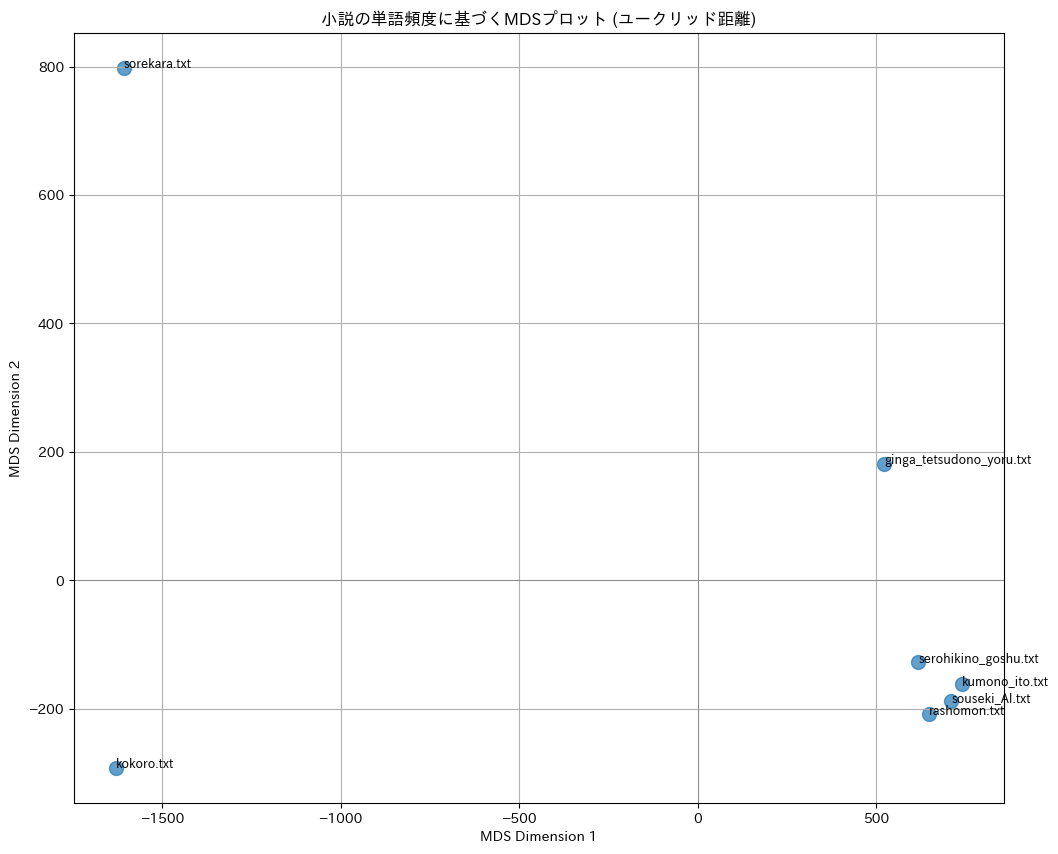

In [10]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS # MDSをインポート
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt # グラフ描画ライブラリをインポート

# グラフの日本語表示をきれいにしてくれる (Colab用)
!pip install japanize-matplotlib --quiet
import japanize_matplotlib # matplotlibで日本語を表示するためのおまじない

# Google Driveのマウント (初回のみ)
from google.colab import drive
drive.mount('/content/drive')

# --- 設定項目 ---
# ステップ6で保存したCSVファイルのパス
input_csv_path = '/content/drive/MyDrive/Mago_Serise/mago199(小説の文章スタイル)/result/word_frequencies.csv'

try:
    df_word_freq = pd.read_csv(input_csv_path, index_col=0)
    print("--- 単語頻度表 (読み込み確認) ---")
    print(f"形状: {df_word_freq.shape}")
    print(df_word_freq.head())

    if df_word_freq.shape[1] < 2:
        print("\nエラー: MDSで配置するには少なくとも2つ以上の小説（列）が必要です。")
    else:
        # --- 1. 距離行列の作成 (ユークリッド距離) ---
        # DataFrameの列（各小説の単語頻度ベクトル）間の総当たりでユークリッド距離を計算する。
        # scikit-learnのeuclidean_distancesは、(サンプル数, 特徴量数)の入力を期待する。
        # 今回は、小説が「サンプル」、単語が「特徴量」と見なせる。
        # DataFrameの値を転置(.T)すると、行が小説、列が単語の頻度になる。
        feature_vectors = df_word_freq.T.values # 行:小説, 列:単語頻度 のNumPy配列
        novel_names = df_word_freq.columns.tolist() # 小説名のリスト

        # ユークリッド距離行列を計算
        # (注意) 添付資料のMDSのコードでは、小説「名」のレーベンシュタイン距離を使っていました。
        # ここでは、より本質的な「単語頻度ベクトル」間のユークリッド距離を使用します。
        distance_matrix = euclidean_distances(feature_vectors)
        # distance_matrix[i, j] は i番目の小説とj番目の小説の間の距離

        print("\n--- 距離行列 (最初の5x5部分) ---")
        print(pd.DataFrame(distance_matrix, index=novel_names, columns=novel_names).iloc[:5, :5])

        # --- 2. MDSの適用 ---
        # n_components=2 : 2次元空間に配置
        # dissimilarity='precomputed' : 入力が既に距離行列であることを示す
        # random_state : 結果を再現可能にするための乱数シード (MDSのアルゴリズムは乱択を含むことがある)
        mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, normalized_stress=False) # normalized_stressは警告回避のため
        # (注) MDSにはストレスという指標があり、元の距離関係をどれだけ保持できているかを示す。
        #     normalized_stress=True (デフォルト) は新しいバージョンで推奨されるが、
        #     古いバージョンのsklearnでは警告が出ることがあるためFalseにしています。
        #     より厳密には、ストレス値も評価すると良い。

        # 距離行列をMDSにフィットさせ、2次元座標を取得
        pos = mds.fit_transform(distance_matrix)
        # pos は (小説数, 2) の形状のNumPy配列で、各行が小説の(x, y)座標

        print("\n--- MDSによる2次元座標 (最初の5件) ---")
        print(pd.DataFrame(pos, index=novel_names, columns=['Dim1', 'Dim2']).head())

        # --- 3. 結果のプロット ---
        plt.figure(figsize=(12, 10)) # グラフのサイズを少し大きめに
        plt.scatter(pos[:, 0], pos[:, 1], s=100, alpha=0.7) # sはマーカーサイズ, alphaは透明度

        # 各点に小説名を表示
        for i, txt in enumerate(novel_names):
            plt.annotate(txt, (pos[i, 0], pos[i, 1]), fontsize=9)

        plt.title('小説の単語頻度に基づくMDSプロット (ユークリッド距離)')
        plt.xlabel('MDS Dimension 1')
        plt.ylabel('MDS Dimension 2')
        plt.grid(True)
        plt.axhline(0, color='grey', lw=0.5) # x軸
        plt.axvline(0, color='grey', lw=0.5) # y軸
        plt.show()

except FileNotFoundError:
    print(f"エラー: CSVファイルが見つかりませんでした。パスを確認してください: {input_csv_path}")
except Exception as e:
    print(f"エラーが発生しました: {e}")

# ステップ9：結果の吟味と考察 - 地図から何が読み取れる？

MDSプロットで小説の関係性が視覚化されました！でも、この「地図」は一体何を教えてくれているのでしょうか？ただ眺めるだけでなく、プロットされた点の配置から、作者ごとの傾向や、特定の作品群のまとまり、あるいは予想外の関係性などを読み解いていく「考察」のステップが重要です。

**① このステップの問い**

*   MDSプロットで近くに集まっている小説群には、何か共通点があるだろうか？（例：同じ作者、同じ時代、同じジャンルなど）
*   逆に、一つだけポツンと離れている小説があるとしたら、それはなぜだろうか？
*   AIが生成した小説は、人間の書いた小説と比べて、MDSプロット上でどのような位置に来るだろうか？それは何を意味するだろうか？
*   今回の分析方法（特定の品詞の頻度に基づくMDS）の限界や、もっと深掘りできそうな点は何だろうか？

**② きみの仮説は？**

*   同じ作者の作品は、やっぱり近くにまとまってプロットされそう。文体ってそんなに変わらないんじゃないかな。
*   もしAIが特定の作家風の文章を生成するように指示されていたら、その作家の作品群の近くにプロットされるかもしれない。
*   使っている品詞の種類や単語の選び方だけで「文章スタイル」の全てが分かるわけではないから、この地図が全てを表しているわけではないはず。でも、何かしらの傾向は掴めると思う。

**③ やってみよう！演習課題 (考察がメイン)**

このステップでは、新しいプログラムコードの実行は必須ではありません。ステップ8で作成したMDSプロットの結果をじっくりと観察し、以下の観点から考察を深めてみましょう。もし、添付資料の図7や図8のような、AI作品や異なる作者の作品を含むMDSプロットを（ステップ8までの手順を応用して自分で）作成できていれば、より具体的な考察が可能です。

**考察のポイント**

1.  **同じ作者の作品群のまとまり**:
    *   MDSプロット上で、同じ作者の作品は近くに集まっていますか？
    *   もし集まっているとしたら、それはなぜだと考えられますか？（共通の語彙、言い回し、文の構造など）
    *   もし同じ作者でも離れている作品があるとしたら、それはどんな作品で、なぜ離れていると考えられますか？（作風の変化、テーマの違い、実験的な作品など）

2.  **異なる作者の作品群の比較**:
    *   異なる作者の作品群は、プロット上で明確に分かれて表示されていますか？
    *   文豪Aと文豪Bの作品群が離れているとしたら、彼らの文体の違いはどのような点にあると推測できますか？（ステップ5で見た頻出単語の違いなどがヒントになるかもしれません）
    *   もし、異なる作者なのに意外と近くにプロットされている作品があったら、それはなぜでしょうか？（時代背景の共有、影響関係、扱っているテーマの類似性など）

3.  **AIが生成した小説の位置づけ (もし分析対象に含めていれば)**:
    *   AIが生成した小説（例：漱石風AI小説）は、MDSプロット上でどのあたりに位置しましたか？
    *   もし「漱石風」を目指したAI小説が、実際の漱石の作品群の近くにプロットされたとしたら、AIはある程度その「らしさ」を捉えられていると言えるでしょうか？
    *   逆に、人間の作品群から大きく外れた位置にプロットされたとしたら、AIの文章にはどんな特徴がある（あるいは欠けている）と考えられますか？

4.  **分析手法の妥当性と限界**:
    *   今回、小説のスタイルを「特定の品詞の単語の出現頻度」という観点から分析しました。この方法は、小説のどんな側面を捉えるのに有効だったと思いますか？
    *   逆に、この方法では捉えきれない「文章スタイル」の要素にはどんなものがあるでしょうか？（例：文の長さ、複雑さ、比喩表現の巧みさ、リズム、物語の構成など）
    *   もし、より深く文章スタイルを分析するとしたら、他にどんな情報を使ったり、どんな分析手法を試したりしてみたいですか？（例：N-gram分析、TF-IDF、トピックモデル、より高度な機械学習モデルなど）

5.  **自分の感覚との比較**:
    *   MDSプロットの結果は、あなたが普段小説を読んで感じる「この作家っぽい」「この作品とあの作品は雰囲気が似ている」といった感覚と一致していましたか？
    *   もし一致していた部分があれば、それはなぜだと思いますか？
    *   もし感覚とズレていた部分があれば、それはなぜだと考えられますか？コンピュータの分析結果が新しい発見を与えてくれたのか、それとも分析の限界を示しているのか、考えてみましょう。

**（もし可能であれば）結果の共有とディスカッション**

*   自分のMDSプロットの結果と、それに対する考察を、他の人（クラスメイトや先生）と共有してみましょう。
*   他の人の結果や考察を聞くことで、新たな気づきや、自分の分析の改善点が見つかるかもしれません。



# ステップ10：さらなる探究へ - 次は何を調べる？どう進化させる？

これで、小説の文章スタイルを分析する一連の探究が終わりました！MDSプロットという形で、文豪たちの作品やAIの文章の関係性を「地図」として描き出すことができましたね。しかし、科学の探究に終わりはありません。今回の分析で見えてきたこと、そして見えなかったことを元に、さらにどんな問いを立て、どんな分析へと発展させていけるでしょうか？

**① このステップの問い**

*   今回の分析で「面白い！」と思った発見や、「もっと知りたい！」と思った疑問は何だろうか？
*   もし、この研究を続けるとしたら、次にどんなテーマで、どんなアプローチで文章スタイルを分析してみたいだろうか？
*   今回の分析手法やプログラムを、もっと良くするためにはどんな改善ができそうだろうか？
*   文章スタイルの分析は、国語の学習や創作活動、あるいは他の分野にどんな風に役立てられる可能性があるだろうか？

**② きみの仮説は？**

*   もっとたくさんの作家やジャンルの小説を分析したら、さらに面白い「文体マップ」が作れるかもしれない。
*   単語の頻度だけじゃなくて、「どんな単語とどんな単語が一緒に使われやすいか（共起関係）」とか、「文の平均的な長さ」とかも分析に加えたら、もっと詳しくスタイルを分類できそう。
*   この技術を応用すれば、自分の書いた文章がどの作家のスタイルに近いか診断するツールとか作れたら面白そう。

**③ やってみよう！発展課題 (アイデア出しと計画)**

このステップでは、主にブレインストーミングと今後の計画立てを行います。

**1. 分析対象の拡大・変更**
    *   **作家の追加**: 今回分析した作家以外に、どんな作家の作品を分析してみたいですか？（例：現代作家、海外の作家（翻訳文）、自分の好きな作家など）
    *   **ジャンルの拡大**: 小説以外の文章（詩、エッセイ、新聞記事、SNSの投稿など）のスタイル分析は可能でしょうか？どんな違いが見られそうでしょうか？
    *   **時代の比較**: 同じ作家の初期の作品と後期の作品で、文体に変化はあるでしょうか？あるいは、異なる時代の作家間で、時代ごとの文体の特徴は見られるでしょうか？

**2. 分析手法の高度化・多様化**
    *   **N-gram分析**: 単語単体だけでなく、「2つの単語の連続（バイグラム）」や「3つの単語の連続（トライグラム）」の出現頻度を分析すると、より細かな言い回しのクセが捉えられるかもしれません。
        *   例：`MeCab.Tagger("-Owakati")` で分かち書きした後、隣り合う単語をペアにする処理を追加する。
    *   **TF-IDF**: 単に多く出現する単語だけでなく、「その文書を特徴づける重要な単語（他の文書ではあまり出ないが、その文書ではよく出る単語）」に重みを与えるTF-IDFという指標を使うと、より本質的なキーワードを抽出できるかもしれません。
    *   **品詞の組み合わせ**: 「名詞＋動詞」や「形容詞＋名詞」のような、特定の品詞の組み合わせパターンに注目するのも面白いかもしれません。
    *   **文の構造**: 一文の平均的な長さ、読点（、）や句点（。）の使われ方、複文の多さなど、文構造に関する特徴量を抽出して分析に加えることも考えられます。
    *   **トピックモデル (LDAなど)**: 文章群の背後にある潜在的な「トピック（話題）」を推定し、各小説がどのトピックをどの程度含んでいるかを分析することで、内容的な類似性も考慮できるかもしれません。

**3. プログラム・ツールの改善**
    *   **対話的な分析**: 分析したいファイルや品詞、パラメータなどをユーザーが簡単に入力・変更して、すぐに結果を見られるようなインターフェース（例えば、StreamlitやGradioといったライブラリを使う）を作成することは可能でしょうか？
    *   **結果の自動解釈支援**: MDSプロット上で特定のクラスタ（点の集まり）が見られた場合、そのクラスタを特徴づける単語（他のクラスタと比較して出現頻度が高い単語など）を自動で提示する機能は作れるでしょうか？

**4. 応用先の探求**
    *   **国語教育**: 作家の文体特徴を客観的なデータで示すことで、文学作品の読解を深める教材として使えないでしょうか？
    *   **文章作成支援**: 自分の書いた文章が、目標とする文体（例えば「簡潔なスタイル」「重厚なスタイル」など）にどれだけ近いかを評価したり、改善点を提案したりするツールは考えられないでしょうか？
    *   **真贋判定**: 歴史的な文書や匿名の文書が、本当に特定の人物によって書かれたものか（あるいは偽作か）を、文体分析によって推定する試みはできないでしょうか？（これは非常に高度な応用です）

**計画シートの作成 (例)**

| 次に取り組みたいテーマ                                 | 具体的な分析対象/手法                                                                 | 必要になりそうな技術/知識                                     | 期待される発見/面白そうな点                                                                 |
| :----------------------------------------------------- | :------------------------------------------------------------------------------------ | :------------------------------------------------------------ | :------------------------------------------------------------------------------------------ |
| 例：夏目漱石の初期作品と後期作品の文体変化の比較         | 『吾輩は猫である』『坊っちゃん』 vs 『こころ』『明暗』。単語頻度、平均文長、特定の接続詞の使用頻度。 | Python (Pandas, MeCab, Matplotlib)、統計の基礎知識。           | 作家の成熟に伴う文体の変化が客観的に捉えられるか。                                                  |
| 例：AIは本当に「〇〇風」の文体を獲得できるのか？         | 様々な指示（作家名、ジャンル、雰囲気）でAIに文章生成させ、MDSや他の指標で人間作品と比較。     | 生成AIのAPI利用、プロンプトエンジニアリング、より多様な文体特徴量。 | AIの模倣能力の限界と可能性。どんな指示だと「らしさ」が出るか。                                       |
| (自分で考えてみよう)                                   |                                                                                       |                                                               |                                                                                             |





# おわりに

10ステップにわたる「小説の文章スタイル分析探究」の旅、お疲れ様でした！
この教材を通して、コンピュータがどのように言葉を扱い、そこからどんな情報を引き出し、そしてそれをどのように可視化して人間が解釈できるようにするのか、その一端を体験できたことと思います。

最初は難しそうに思えたPythonのコードも、一つ一つの命令の意味を理解し、実際に動かして結果を見ることで、だんだんと「自分でコンピュータを操っている」という実感に変わってきたのではないでしょうか。

今回の分析は、文章スタイルのほんの一面に光を当てたに過ぎません。しかし、この小さな一歩が、皆さんの知的好奇心を刺激し、「もっと知りたい」「こんなこともできるんじゃないか」という新たな探究心へとつながることを願っています。

国語で読む文学作品の味わい方、情報科で学ぶデータの扱い方、そして日常生活で触れる様々な文章。それらを見る目が、この探究を通して少しでも豊かになったとしたら、これ以上の喜びはありません。

これからも、身の回りの現象に「なぜ？」「どうすれば分かる？」という問いを持ち続け、データと対話し、論理的に考える力を養っていってください。

皆さんの未来の探究を応援しています！